<a href="https://colab.research.google.com/github/bowen27/Swamp-World/blob/main/Copy_of_ParameterTest02052025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌿 **Modeling Swamps: A Case Study**

## **Introduction**
In this notebook, we explore a **difficult swamp modeling scenario** using a planet with:
- **Low Global Equivalent Water Layer (GEL = 500 m)**  
- **Low Hydraulic Conductivity (K = 1e-5 m/s)**  

---

## **Notebook Structure**
We analyze the **three key components** of swamp formation:
1. **Initialization**
2. **Shoreline Evolution**  
3. **Swamp Evolution**  





In [36]:
import importlib
from lib.utils import *

def reload_lib_modules():
    importlib.reload(lib.utils)
    print("Reloaded lib.utils")

# test_reload()


In [37]:
reload_lib_modules()
from lib.utils import *  # re-import to update names

# Step 1: Define Model Parameters
params = {
    'S': 1367 / 4,       # Solar constant in W/m²
    'r': 3.4e6,          # Planetary radius in meters
    'g': 3.7,            # Gravity in m/s²
    'K': 1e-2,           # Hydraulic conductivity in m/s
    'n_s': 0.2,          # Surface porosity
    'K_lunar': 6.5e3,    # Lunar porosity decay constant
    'g_lunar': 1.62,     # Lunar gravity
    'GEL': 1000,         # Global equivalent layer of water in meters
    'extreme_index': 1,  # Fraction of time when rainfall happens
    'moisture_transport': 20,  # ITCZ range in degrees
    'latitude_degree': 5,       # Spatial resolution in degrees
    'topo_choice': "PositiveSlope",  # Type of topography
    'topo_amplitude': 1e4           # Topographic height scale in meters
}

# Step 2: Update Derived Parameters
params = update_params(params)

# Step 3: Run the Hydrological Model
results = run_hydrological_model(params, save = False, debug = False)

Reloaded lib.utils
Run out of water with surface ocean at height = 4200.0 m!
Shoreline evolution completed.
Swamp evolution completed.
🚀 Groundwater simulation 0% completed
🚀 Groundwater simulation 10% completed
🚀 Groundwater simulation 20% completed
🚀 Groundwater simulation 30% completed
🚀 Groundwater simulation 40% completed
🚀 Groundwater simulation 50% completed
🚀 Groundwater simulation 60% completed
🚀 Groundwater simulation 70% completed
🚀 Groundwater simulation 80% completed
🚀 Groundwater simulation 90% completed

Mass Conservation Error: 0.03%
Groundwater Table Amplitude: 2292.18 m
Wet Surface Fraction: 71.13%
Swamp Fraction: 38.23%
Surface Water Cycling Time: 3.18e+03 years
Groundwater Cycling Time: 6.08e+03 years

✅ Hydrological model run completed!


In [23]:
reload_lib_modules()
from lib.utils import *  # re-import to update names

# Define the range of GEL values to sweep
# gel_values = list(range(10000, 999, -1000))
gel_values = list(range(1000, 199, -100))

# Define model parameters
params = {
    'S': 1367 / 4,       # Solar constant in W/m²
    'r': 3.4e6,          # Planetary radius in meters
    'g': 3.7,            # Gravity in m/s²
    'K': 1e-7,           # Hydraulic conductivity in m/s
    'n_s': 0.2,          # Surface porosity
    'K_lunar': 6.5e3,    # Lunar porosity decay constant
    'g_lunar': 1.62,     # Lunar gravity
    'GEL': 2000,         # Global equivalent layer of water in meters
    'extreme_index': 1,  # Fraction of time when rainfall happens
    'moisture_transport': 20,  # ITCZ range in degrees
    'latitude_degree': 5,       # Spatial resolution in degrees
    'topo_choice': "PositiveSlope",  # Type of topography
    'topo_amplitude': 1e3            # Topographic height scale in meters
}

# Initialize a list to store results
sweep_results = []

# Loop over each GEL value and run the hydrological model
for gel in gel_values:
    # Update the GEL parameter
    params["GEL"] = gel

    # Ensure derived parameters are updated
    params = update_params(params)

    # Print progress
    print(f"\n🚀 Running simulation for GEL = {gel:.0f} m...")

    # Run the model
    result = run_hydrological_model(params, save=True, debug=False)

    # Store the result
    sweep_results.append(result)

# Display the results
import pandas as pd
df_results = pd.DataFrame(sweep_results)



🚀 Running simulation for GEL = 1000 m...
Run out of water with surface ocean at height = 920.0 m!
Shoreline evolution completed.
Swamp evolution completed.
🏝️ Land area is too small for meaningful groundwater evolution. Skipping groundwater redistribution.

Mass Conservation Error: 0.10%
Groundwater Table Amplitude: 55.30 m
Wet Surface Fraction: 100.00%
Swamp Fraction: 1.70%
Surface Water Cycling Time: 9.14e+02 years
Groundwater Cycling Time: 7.34e+11 years
✅ Results saved successfully to hydro_K1.0e-07_GEL1000_MT20_topo_PositiveSlope_amp1000.h5

✅ Hydrological model run completed!

🚀 Running simulation for GEL = 900 m...
Run out of water with surface ocean at height = 820.0 m!
Shoreline evolution completed.
Swamp evolution completed.
🏝️ Land area is too small for meaningful groundwater evolution. Skipping groundwater redistribution.

Mass Conservation Error: 0.03%
Groundwater Table Amplitude: 171.05 m
Wet Surface Fraction: 100.00%
Swamp Fraction: 9.04%
Surface Water Cycling Time: 8.2

In [6]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-07_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
gel_list, amp_list = [], []
error_list, groundwater_amp_list = [], []
wet_surface_list, swamp_frac_list = [], []
surf_cycling_list, gw_cycling_list = [], []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            gel = f['inputs'].attrs['GEL']
            amp = f['inputs'].attrs['topography_amplitude']
            error_i = f['post_processed_outputs'].attrs['error_I']
            gw_amp = f['post_processed_outputs'].attrs['groundwater_amplitude']
            wet_surface_frac = f['post_processed_outputs'].attrs['wet_surface_fraction']
            swamp_frac = f['post_processed_outputs'].attrs['swamp_fraction']
            surf_cycling = f['post_processed_outputs'].attrs['surface_cycling_time'] / 1e3  # Convert to kyrs
            gw_cycling = f['post_processed_outputs'].attrs['groundwater_cycling_time'] / 1e6  # Convert to Myrs

            # Handle extreme cycling times
            if surf_cycling > 1e8:
                surf_cycling = np.nan
            if gw_cycling > 1e8:
                gw_cycling = np.nan

            # Append data
            gel_list.append(gel)
            amp_list.append(amp)
            error_list.append(error_i * 100)  # Convert to percentage
            groundwater_amp_list.append(gw_amp)
            wet_surface_list.append(wet_surface_frac)  # Convert to percentage
            swamp_frac_list.append(swamp_frac)  # Convert to percentage
            surf_cycling_list.append(surf_cycling)
            gw_cycling_list.append(gw_cycling)

        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to arrays and extract unique values
gel_array, amp_array = np.array(gel_list), np.array(amp_list)
error_array, groundwater_amp_array = np.array(error_list), np.array(groundwater_amp_list)
wet_surface_array, swamp_frac_array = np.array(wet_surface_list), np.array(swamp_frac_list)
surf_cycling_array, gw_cycling_array = np.array(surf_cycling_list), np.array(gw_cycling_list)

unique_gel = np.unique(gel_array)
unique_amp = np.unique(amp_array)

# Create grids and populate values
error_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
groundwater_amp_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
wet_surface_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
swamp_frac_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
surf_cycling_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
gw_cycling_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)

for g, a, e, gw_amp, wet_surf, swamp_f, surf_cyc, gw_cyc in zip(
        gel_array, amp_array, error_array, groundwater_amp_array,
        wet_surface_array, swamp_frac_array, surf_cycling_array, gw_cycling_array):
    i = np.where(unique_gel == g)[0][0]
    j = np.where(unique_amp == a)[0][0]
    error_grid[i, j] = e
    groundwater_amp_grid[i, j] = gw_amp
    wet_surface_grid[i, j] = wet_surf
    swamp_frac_grid[i, j] = swamp_f
    surf_cycling_grid[i, j] = surf_cyc
    gw_cycling_grid[i, j] = gw_cyc

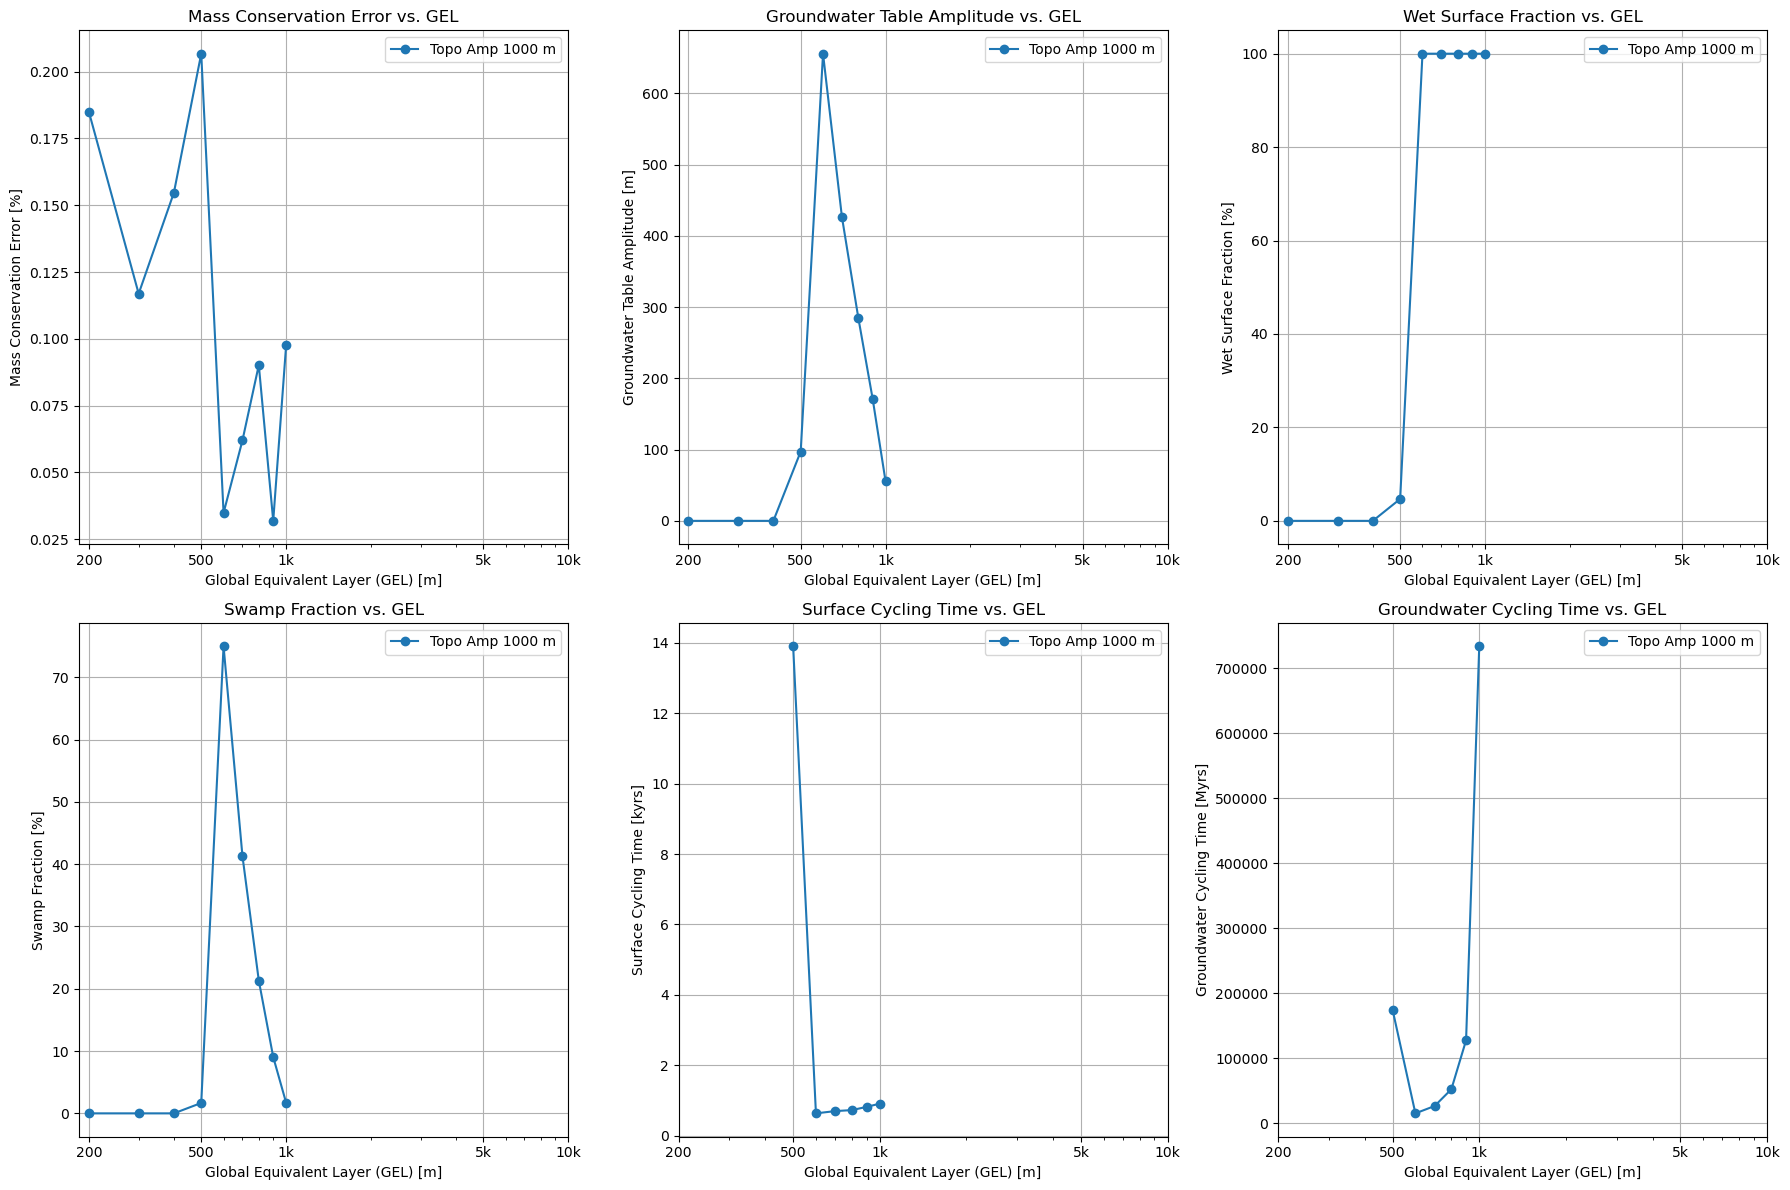

In [7]:
# Plot all post-processed data
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Define custom X-ticks
xticks = [200, 500, 1000, 5000, 10000]
xticklabels = ["200", "500", "1k", "5k", "10k"]

# Define a function to plot subfigures
def plot_subplot(ax, grid_data, ylabel, title, log_scale=True):
    for j, topo_amp in enumerate(unique_amp):
        valid_data = ~np.isnan(grid_data[:, j])
        if np.any(valid_data):
            ax.plot(unique_gel[valid_data], grid_data[valid_data, j], marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")
    if log_scale:
        ax.set_xscale("log")
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel("Global Equivalent Layer (GEL) [m]")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid()

# Mass Conservation Error
plot_subplot(axs[0, 0], error_grid, "Mass Conservation Error [%]", "Mass Conservation Error vs. GEL")

# Groundwater Table Amplitude
plot_subplot(axs[0, 1], groundwater_amp_grid, "Groundwater Table Amplitude [m]", "Groundwater Table Amplitude vs. GEL")

# Wet Surface Fraction
plot_subplot(axs[0, 2], wet_surface_grid, "Wet Surface Fraction [%]", "Wet Surface Fraction vs. GEL")

# Swamp Fraction
plot_subplot(axs[1, 0], swamp_frac_grid, "Swamp Fraction [%]", "Swamp Fraction vs. GEL")

# Surface Cycling Time
plot_subplot(axs[1, 1], surf_cycling_grid, "Surface Cycling Time [kyrs]", "Surface Cycling Time vs. GEL")

# Groundwater Cycling Time
plot_subplot(axs[1, 2], gw_cycling_grid, "Groundwater Cycling Time [Myrs]", "Groundwater Cycling Time vs. GEL")

plt.tight_layout()
plt.show()


Reloaded lib.utils


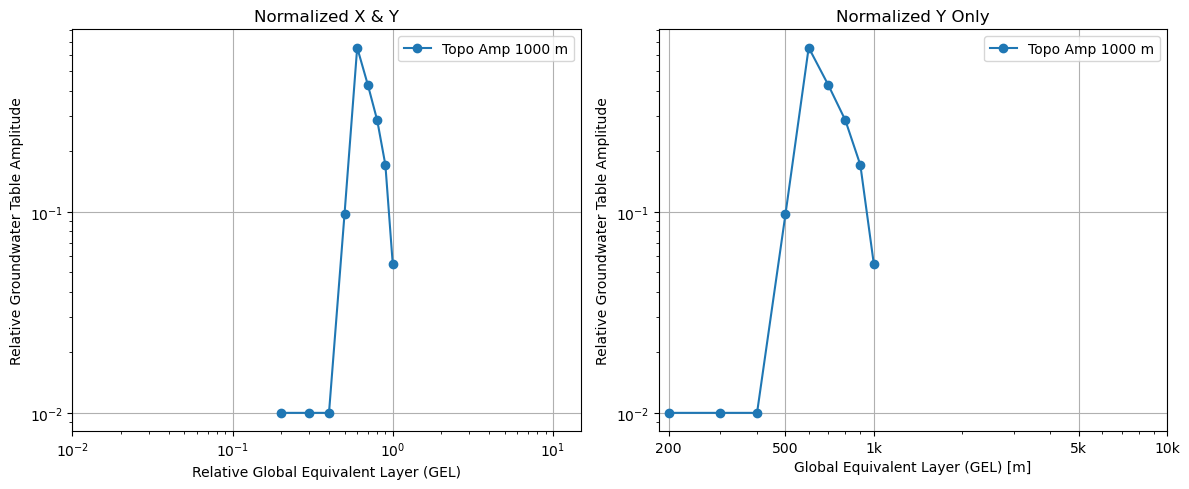

In [24]:
reload_lib_modules()
from lib.utils import *  # re-import to update names

import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-07_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
gel_list = []
amp_list = []
groundwater_amp_list = []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            gel = f['inputs'].attrs['GEL']
            amp = f['inputs'].attrs['topography_amplitude']
            groundwater_amp = f['post_processed_outputs'].attrs['groundwater_amplitude']

            gel_list.append(gel)
            amp_list.append(amp)
            groundwater_amp_list.append(groundwater_amp)
        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to arrays and extract unique values
gel_array = np.array(gel_list)
amp_array = np.array(amp_list)
groundwater_amp_array = np.array(groundwater_amp_list)

unique_gel = np.unique(gel_array)
unique_amp = np.unique(amp_array)

# Create grid and populate values
groundwater_amp_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)

for g, a, ga in zip(gel_array, amp_array, groundwater_amp_array):
    i = np.where(unique_gel == g)[0][0]
    j = np.where(unique_amp == a)[0][0]
    groundwater_amp_grid[i, j] = ga

# ✅ Define lower limit for normalized groundwater amplitude
y_min_plot = 1e-2   # Minimum normalized value for log-scale plotting

# **Panel 1: Normalize X (GEL) and Y (Groundwater Amplitude) by Topo Amplitude**
normalized_gel = unique_gel[:, None] / unique_amp  # Normalize each GEL value by the corresponding topo amplitude
normalized_groundwater_amp = groundwater_amp_grid / unique_amp  # Normalize amplitude by topo amplitude

# ✅ Apply lower limit
normalized_groundwater_amp[normalized_groundwater_amp < y_min_plot] = y_min_plot

# **Panel 2: Normalize only Y (Groundwater Amplitude)**
absolute_gel = unique_gel[:, None]  # Keep GEL absolute
normalized_only_Y = groundwater_amp_grid / unique_amp  # Normalize Y only

# ✅ Apply lower limit
normalized_only_Y[normalized_only_Y < y_min_plot] = y_min_plot

# **Create dual-panel figure**
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# **Panel 1: Normalize X and Y**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(normalized_groundwater_amp[:, j])
    if np.any(valid_data):
        axs[0].plot(normalized_gel[valid_data, j], normalized_groundwater_amp[valid_data, j],
                    marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xlim(1e-2, 1.5e1)
axs[0].set_xlabel("Relative Global Equivalent Layer (GEL)")
axs[0].set_ylabel("Relative Groundwater Table Amplitude")
axs[0].set_title("Normalized X & Y")
axs[0].legend()
axs[0].grid()

# **Panel 2: Normalize only Y (Absolute X)**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(normalized_only_Y[:, j])
    if np.any(valid_data):
        axs[1].plot(unique_gel[valid_data], normalized_only_Y[valid_data, j],
                    marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")

axs[1].set_xscale("log")
axs[1].set_yscale("log")
# axs[1].set_xlim(200, 10000)
axs[1].set_xticks([200, 500, 1000, 5000, 10000])
axs[1].set_xticklabels(["200", "500", "1k", "5k", "10k"])
axs[1].set_xlabel("Global Equivalent Layer (GEL) [m]")
axs[1].set_ylabel("Relative Groundwater Table Amplitude")
axs[1].set_title("Normalized Y Only")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


/var/folders/nd/qgcpy3c57ks69017cylpgxpm0000gn/T/ipykernel_16738/703139898.py:92: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


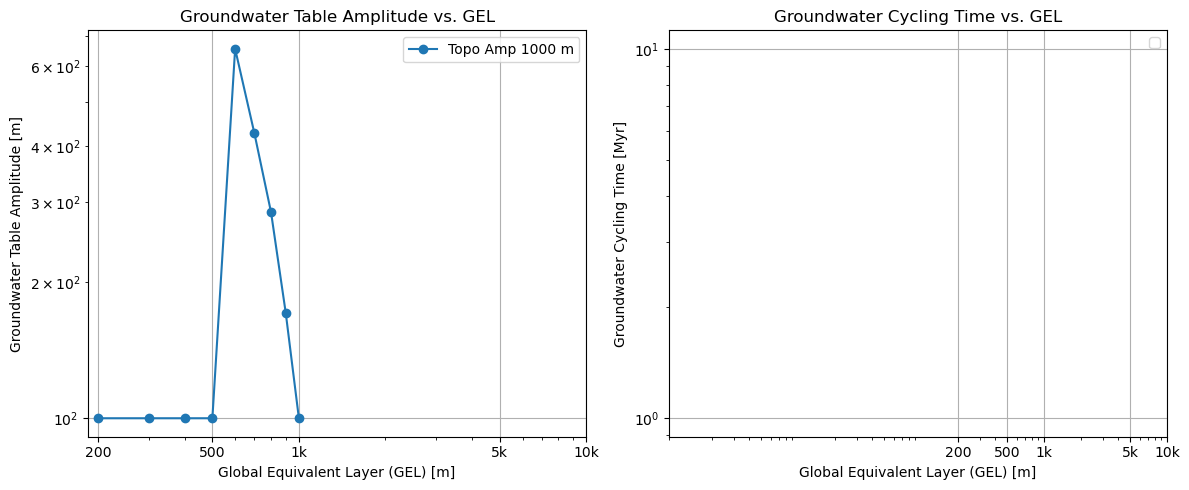

In [25]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-07_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
gel_list = []
amp_list = []
groundwater_amp_list = []
groundwater_cycling_list = []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            gel = f['inputs'].attrs['GEL']
            amp = f['inputs'].attrs['topography_amplitude']
            groundwater_amp = f['post_processed_outputs'].attrs['groundwater_amplitude']
            groundwater_cycling = f['post_processed_outputs'].attrs['groundwater_cycling_time']

            gel_list.append(gel)
            amp_list.append(amp)
            groundwater_amp_list.append(groundwater_amp)
            groundwater_cycling_list.append(groundwater_cycling)
        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to arrays and extract unique values
gel_array = np.array(gel_list)
amp_array = np.array(amp_list)
groundwater_amp_array = np.array(groundwater_amp_list)
groundwater_cycling_array = np.array(groundwater_cycling_list)

unique_gel = np.unique(gel_array)
unique_amp = np.unique(amp_array)

# Create grids and populate values
groundwater_amp_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
groundwater_cycling_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)

for g, a, ga, gc in zip(gel_array, amp_array, groundwater_amp_array, groundwater_cycling_array):
    i = np.where(unique_gel == g)[0][0]
    j = np.where(unique_amp == a)[0][0]
    groundwater_amp_grid[i, j] = ga
    groundwater_cycling_grid[i, j] = gc

# ✅ Define different lower & upper limits
y_min_amp = 1.0e+2  # Lower limit for Groundwater Table Amplitude [meters] (100 m)
y_min_cycle = 1e3   # Lower limit for Groundwater Cycling Time [years] (1 kyrs)
y_max_cycle = 10e9   # Maximum for Groundwater Cycling Time [years] (4 Gyrs)

# ✅ Apply different lower & upper limits
groundwater_amp_grid[groundwater_amp_grid < y_min_amp] = y_min_amp
groundwater_cycling_grid[groundwater_cycling_grid < y_min_cycle] = y_min_cycle
groundwater_cycling_grid[groundwater_cycling_grid > y_max_cycle] = np.nan  # Remove unrealistic values

# Plot only the 2nd and 6th panels (Groundwater Amplitude & Groundwater Cycling Time)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# **Panel 1: Groundwater Table Amplitude**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(groundwater_amp_grid[:, j])
    if np.any(valid_data):
        axs[0].plot(unique_gel[valid_data], groundwater_amp_grid[valid_data, j], marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xticks([200, 500, 1000, 5000, 10000])
axs[0].set_xticklabels(["200", "500", "1k", "5k", "10k"])
axs[0].set_xlabel("Global Equivalent Layer (GEL) [m]")
axs[0].set_ylabel("Groundwater Table Amplitude [m]")
axs[0].set_title("Groundwater Table Amplitude vs. GEL")
axs[0].legend()
axs[0].grid()

# **Panel 2: Groundwater Cycling Time**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(groundwater_cycling_grid[:, j])
    if np.any(valid_data):
        axs[1].plot(unique_gel[valid_data], groundwater_cycling_grid[valid_data, j] / 1e6, marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")  # Convert to Myrs

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xticks([200, 500, 1000, 5000, 10000])
axs[1].set_xticklabels(["200", "500", "1k", "5k", "10k"])
axs[1].set_xlabel("Global Equivalent Layer (GEL) [m]")
axs[1].set_ylabel("Groundwater Cycling Time [Myr]")
axs[1].set_title("Groundwater Cycling Time vs. GEL")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


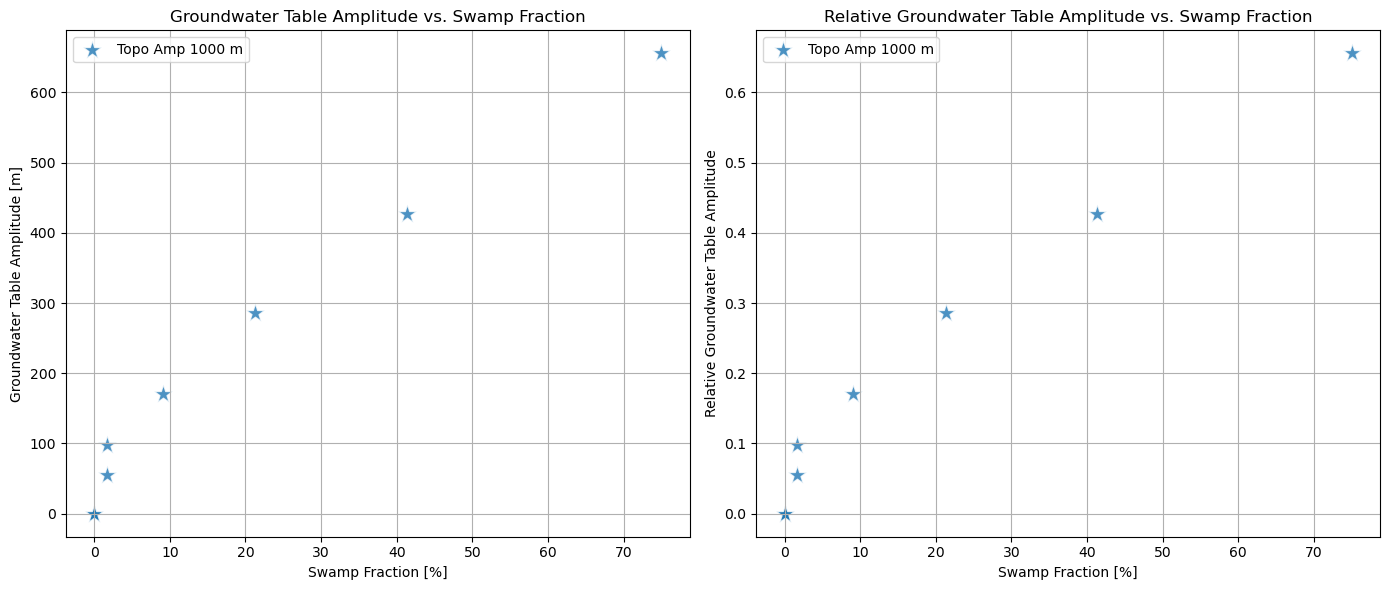

In [10]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-07_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
amp_list = []
swamp_frac_list = []
groundwater_amp_list = []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            amp = f['inputs'].attrs['topography_amplitude']
            swamp_frac = f['post_processed_outputs'].attrs['swamp_fraction']
            groundwater_amp = f['post_processed_outputs'].attrs['groundwater_amplitude']

            amp_list.append(amp)
            swamp_frac_list.append(swamp_frac)
            groundwater_amp_list.append(groundwater_amp)

        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to NumPy arrays
amp_array = np.array(amp_list)
swamp_frac_array = np.array(swamp_frac_list)
groundwater_amp_array = np.array(groundwater_amp_list)

# **Compute Relative Groundwater Table Amplitude**
relative_groundwater_amp_array = groundwater_amp_array / amp_array

# Extract unique topo amplitudes
unique_amp = np.unique(amp_array)

# **Create a figure with two panels**
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# **Panel 1: Absolute Groundwater Table Amplitude vs. Swamp Fraction**
for topo_amp in unique_amp:
    valid_data = amp_array == topo_amp
    if np.any(valid_data):
        axs[0].scatter(swamp_frac_array[valid_data], groundwater_amp_array[valid_data],
                       marker="*", s=200, edgecolors="w", alpha=0.8, label=f"Topo Amp {topo_amp:.0f} m")

axs[0].set_xlabel("Swamp Fraction [%]")
axs[0].set_ylabel("Groundwater Table Amplitude [m]")
axs[0].set_title("Groundwater Table Amplitude vs. Swamp Fraction")
axs[0].legend()
axs[0].grid()

# **Panel 2: Relative Groundwater Table Amplitude vs. Swamp Fraction**
for topo_amp in unique_amp:
    valid_data = amp_array == topo_amp
    if np.any(valid_data):
        axs[1].scatter(swamp_frac_array[valid_data], relative_groundwater_amp_array[valid_data],
                       marker="*", s=200, edgecolors="w", alpha=0.8, label=f"Topo Amp {topo_amp:.0f} m")

axs[1].set_xlabel("Swamp Fraction [%]")
axs[1].set_ylabel("Relative Groundwater Table Amplitude")
axs[1].set_title("Relative Groundwater Table Amplitude vs. Swamp Fraction")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


/var/folders/nd/qgcpy3c57ks69017cylpgxpm0000gn/T/ipykernel_16738/3274626052.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
/var/folders/nd/qgcpy3c57ks69017cylpgxpm0000gn/T/ipykernel_16738/3274626052.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


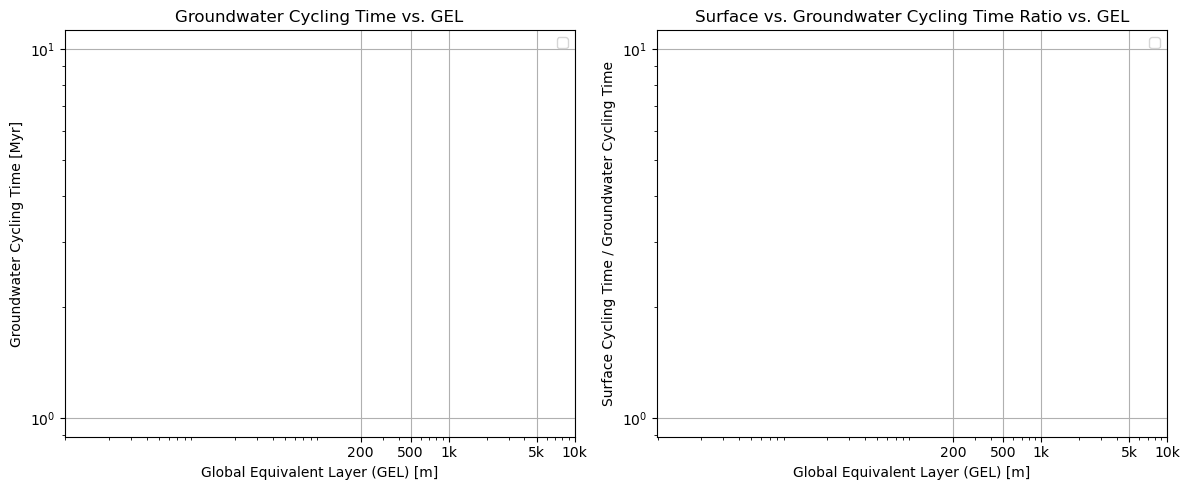

In [26]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-07_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
gel_list = []
amp_list = []
groundwater_cycling_list = []
surf_cycling_list = []
gw_cycling_list = []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            gel = f['inputs'].attrs['GEL']
            amp = f['inputs'].attrs['topography_amplitude']
            groundwater_cycling = f['post_processed_outputs'].attrs['groundwater_cycling_time']
            surf_cycling = f['post_processed_outputs'].attrs['surface_cycling_time']
            gw_cycling = f['post_processed_outputs'].attrs['groundwater_cycling_time']

            # ✅ Exclude only extreme groundwater cycling times (> 1e10 years)
            if groundwater_cycling > 1e10:
                groundwater_cycling = np.nan
            if gw_cycling > 1e10:
                gw_cycling = np.nan

            gel_list.append(gel)
            amp_list.append(amp)
            groundwater_cycling_list.append(groundwater_cycling)
            surf_cycling_list.append(surf_cycling)
            gw_cycling_list.append(gw_cycling)

        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to arrays and extract unique values
gel_array = np.array(gel_list)
amp_array = np.array(amp_list)
groundwater_cycling_array = np.array(groundwater_cycling_list)
surf_cycling_array = np.array(surf_cycling_list)
gw_cycling_array = np.array(gw_cycling_list)

# **Compute the Surface / Groundwater Cycling Ratio**
cycling_ratio_array = surf_cycling_array / gw_cycling_array  # Ratio

# Extract unique values
unique_gel = np.unique(gel_array)
unique_amp = np.unique(amp_array)

# Create grids
groundwater_cycling_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
cycling_ratio_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)

for g, a, gc, cr in zip(gel_array, amp_array, groundwater_cycling_array, cycling_ratio_array):
    i = np.where(unique_gel == g)[0][0]
    j = np.where(unique_amp == a)[0][0]
    groundwater_cycling_grid[i, j] = gc
    cycling_ratio_grid[i, j] = cr

# **Plot Groundwater Cycling Time vs. GEL (Panel 1) and Cycling Ratio vs. GEL (Panel 2)**
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# **Panel 1: Groundwater Cycling Time**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(groundwater_cycling_grid[:, j])
    if np.any(valid_data):
        axs[0].plot(unique_gel[valid_data], groundwater_cycling_grid[valid_data, j] / 1e6,
                    marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")  # Convert to Myrs

axs[0].set_xscale("log")
axs[0].set_yscale("log")
axs[0].set_xticks([200, 500, 1000, 5000, 10000])
axs[0].set_xticklabels(["200", "500", "1k", "5k", "10k"])
axs[0].set_xlabel("Global Equivalent Layer (GEL) [m]")
axs[0].set_ylabel("Groundwater Cycling Time [Myr]")
axs[0].set_title("Groundwater Cycling Time vs. GEL")
axs[0].legend()
axs[0].grid()

# **Panel 2: Surface Cycling Time / Groundwater Cycling Time**
for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(cycling_ratio_grid[:, j])
    if np.any(valid_data):
        axs[1].plot(unique_gel[valid_data], cycling_ratio_grid[valid_data, j],
                    marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")

axs[1].set_xscale("log")
axs[1].set_yscale("log")
axs[1].set_xticks([200, 500, 1000, 5000, 10000])
axs[1].set_xticklabels(["200", "500", "1k", "5k", "10k"])
axs[1].set_xlabel("Global Equivalent Layer (GEL) [m]")
axs[1].set_ylabel("Surface Cycling Time / Groundwater Cycling Time")
axs[1].set_title("Surface vs. Groundwater Cycling Time Ratio vs. GEL")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


/var/folders/nd/qgcpy3c57ks69017cylpgxpm0000gn/T/ipykernel_15881/1929170171.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


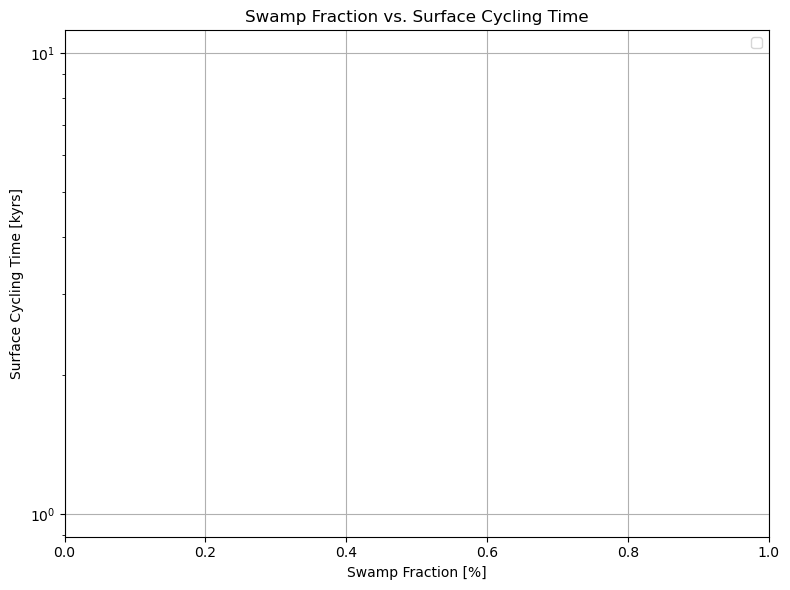

In [12]:
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Collect all relevant files
files = glob.glob("hydro_K1.0e-05_GEL*_MT20_topo_PositiveSlope_amp*.h5")

# Initialize lists for data extraction
gel_list = []
amp_list = []
swamp_frac_list = []
surf_cycling_list = []

# Read data from files
for file in files:
    with h5py.File(file, 'r') as f:
        try:
            gel = f['inputs'].attrs['GEL']
            amp = f['inputs'].attrs['topography_amplitude']
            swamp_frac = f['post_processed_outputs'].attrs['swamp_fraction']
            surf_cycling = f['post_processed_outputs'].attrs['surface_cycling_time']

            # Handle extreme cycling times
            if surf_cycling > 1e8:
                surf_cycling = np.nan

            gel_list.append(gel)
            amp_list.append(amp)
            swamp_frac_list.append(swamp_frac)
            surf_cycling_list.append(surf_cycling)

        except KeyError as e:
            print(f"Warning: Missing key {e} in file {file}. Skipping...")

# Convert to arrays
gel_array = np.array(gel_list)
amp_array = np.array(amp_list)
swamp_frac_array = np.array(swamp_frac_list)
surf_cycling_array = np.array(surf_cycling_list)

# ✅ **Exclude the specific case before reshaping**
exclude_mask = (gel_array == 200) & (amp_array == 10000)

gel_array = gel_array[~exclude_mask]
amp_array = amp_array[~exclude_mask]
swamp_frac_array = swamp_frac_array[~exclude_mask]
surf_cycling_array = surf_cycling_array[~exclude_mask]

# Extract unique values
unique_gel = np.unique(gel_array)
unique_amp = np.unique(amp_array)

# Create grids
swamp_frac_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)
surf_cycling_grid = np.full((len(unique_gel), len(unique_amp)), np.nan)

for g, a, sf, sc in zip(gel_array, amp_array, swamp_frac_array, surf_cycling_array):
    i = np.where(unique_gel == g)[0][0]
    j = np.where(unique_amp == a)[0][0]
    swamp_frac_grid[i, j] = sf
    surf_cycling_grid[i, j] = sc

# **Plot Swamp Fraction vs. Surface Cycling Time for Different Topographic Amplitudes**
fig, ax = plt.subplots(figsize=(8, 6))

for j, topo_amp in enumerate(unique_amp):
    valid_data = ~np.isnan(swamp_frac_grid[:, j]) & ~np.isnan(surf_cycling_grid[:, j])

    if np.any(valid_data):
        ax.plot(swamp_frac_grid[valid_data, j], surf_cycling_grid[valid_data, j] / 1e3,
                marker='o', linestyle='-', label=f"Topo Amp {topo_amp:.0f} m")

# ✅ Log scale for Y-axis (Surface Cycling Time)
ax.set_yscale("log")

# Labels and Title
ax.set_xlabel("Swamp Fraction [%]")
ax.set_ylabel("Surface Cycling Time [kyrs]")
ax.set_title("Swamp Fraction vs. Surface Cycling Time")
ax.legend()
ax.grid()

# **🎯 Add Properly Styled Arrows and Stage Labels**

# Stage 1: Downward arrow (Near Y-axis)
ax.annotate("Stage 1", xy=(0.02, 1e6), xytext=(0.02, 3e6),  # Adjusted positions
            arrowprops=dict(facecolor="blue", edgecolor="blue", arrowstyle="simple", lw=2),
            fontsize=12, color="blue", ha="center")

# Stage 2: Rightward arrow (Near X-axis)
ax.annotate("Stage 2", xy=(20, 5), xytext=(40, 5),  # Adjusted positions
            arrowprops=dict(facecolor="green", edgecolor="green", arrowstyle="simple", lw=2),
            fontsize=12, color="green", ha="center")

# Stage 3: Diagonal arrow (Bottom-right to Top-left)
ax.annotate("Stage 3", xy=(70, 1e3), xytext=(30, 1e6),  # Adjusted positions
            arrowprops=dict(facecolor="red", edgecolor="red", arrowstyle="->", lw=2),
            fontsize=12, color="red", ha="center")

plt.tight_layout()
plt.show()


In [27]:
with h5py.File("hydro_K1.0e-02_GEL5000_MT20_topo_PositiveSlope_amp10000.h5", "r") as f:
    print("Input Parameters:")
    for key, value in f["inputs"].attrs.items():
        print(f"{key}: {value}")

    print("\nPost-Processed Outputs:")
    for key, value in f["post_processed_outputs"].attrs.items():
        print(f"{key}: {value}")

    final_head = np.array(f["raw_outputs/final_head"])
    final_wetness = np.array(f["raw_outputs/final_wetness"])


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'hydro_K1.0e-02_GEL5000_MT20_topo_PositiveSlope_amp10000.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# print(shoreline_h_evolution)